In [62]:
# import the libraries as shown below

import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from sklearn.metrics import precision_score, recall_score, f1_score




from tensorflow.keras.layers import MaxPooling2D, Input, Lambda, Dense, Flatten, Conv2D





In [63]:
from tensorflow.keras.callbacks import Callback

class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data
        self.f1_scores = []  # Create an empty list to store F1 scores

    def on_epoch_end(self, epoch, logs=None):
        val_data = self.validation_data
        val_images, val_labels = next(val_data)
        val_predictions = self.model.predict(val_images)
        val_predictions = np.argmax(val_predictions, axis=1)
        val_true = np.argmax(val_labels, axis=1)

        f1 = f1_score(val_true, val_predictions, average='weighted')
        self.f1_scores.append(f1)  # Append F1 score to the list

        precision = precision_score(val_true, val_predictions, average='weighted')
        recall = recall_score(val_true, val_predictions, average='weighted')

        print(f' - val_f1: {f1:.4f} - val_precision: {precision:.4f} - val_recall: {recall:.4f}')


In [64]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# # Storing the path of training and testing dataset
# train_path = 'cell_images/Train'
# valid_path = 'cell_images/Test'

In [65]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [66]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [67]:
# # useful for getting number of output classes
# folders = glob('../input/malaria-dataset/Dataset/Train/*')

In [68]:
# useful for getting number of output classes
folders = glob('../input/cell-images-for-detecting-malaria/cell_images/*')

In [69]:
folders = folders[:2]
folders

['../input/cell-images-for-detecting-malaria/cell_images/Uninfected',
 '../input/cell-images-for-detecting-malaria/cell_images/Parasitized']

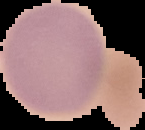

In [70]:
img = Image. open("../input/malaria-dataset/Dataset/Test/Uninfected/2.png")
img

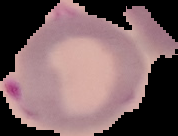

In [71]:
img = Image. open("../input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png")
img

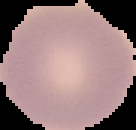

In [72]:
img = Image. open("../input/malaria-dataset/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png")
img

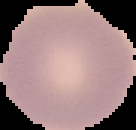

In [73]:
img = Image. open("../input/malaria-dataset/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png")
img

In [74]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [75]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [76]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [77]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [78]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [79]:
test_set = test_datagen.flow_from_directory('../input/malaria-dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [80]:
metrics_callback = MetricsCallback(validation_data=test_set)

In [81]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[metrics_callback]
)



Epoch 1/15
862/862 [==============================] - 368s 426ms/step - loss: 0.3792 - accuracy: 0.8422 - val_loss: 0.6645 - val_accuracy: 0.7090
 - val_f1: 0.7314 - val_precision: 0.8594 - val_recall: 0.7188
Epoch 2/15
862/862 [==============================] - 376s 436ms/step - loss: 0.2757 - accuracy: 0.8921 - val_loss: 0.5218 - val_accuracy: 0.8134
 - val_f1: 0.8247 - val_precision: 0.8929 - val_recall: 0.8125
Epoch 3/15
862/862 [==============================] - 373s 433ms/step - loss: 0.2650 - accuracy: 0.9018 - val_loss: 0.2302 - val_accuracy: 0.9030
 - val_f1: 0.9069 - val_precision: 0.9094 - val_recall: 0.9062
Epoch 4/15
862/862 [==============================] - 367s 426ms/step - loss: 0.2650 - accuracy: 0.9041 - val_loss: 0.6593 - val_accuracy: 0.8209
 - val_f1: 0.8533 - val_precision: 0.9038 - val_recall: 0.8438
Epoch 5/15
862/862 [==============================] - 361s 419ms/step - loss: 0.2535 - accuracy: 0.9082 - val_loss: 0.7529 - val_accuracy: 0.7687
 - val_f1: 0.7083 

In [82]:
training_set.class_indices

{'Parasitized': 0, 'Uninfected': 1}

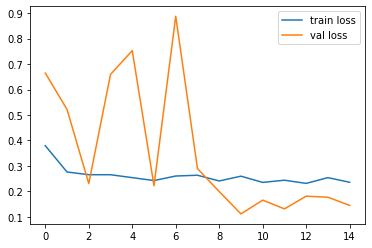

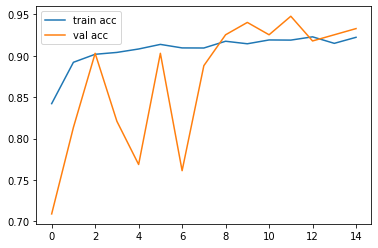

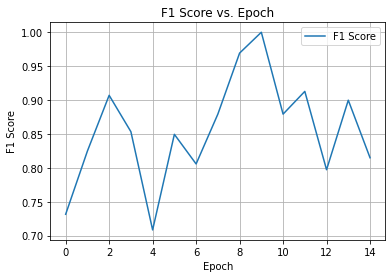

In [83]:
# plot the loss

import matplotlib.pyplot as plt


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

f1_scores = metrics_callback.f1_scores

# Plot the F1 score

plt.plot(metrics_callback.f1_scores, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Epoch')
plt.legend()
plt.grid(True)

# Save the F1 Score plot as an image
plt.savefig('F1_Score_Plot')
plt.show()




In [84]:
# saving our model as h5 file to we can use it later if we want

#model.save('model_vgg19.h5')

In [85]:
# import tensorflow as tf
# tf.keras.utils.plot_model(
#     model, to_file='model.png', show_shapes=True)

# Optional (Testing our Model)

In [86]:
y_pred = model.predict(test_set)

In [87]:
y_pred = np.argmax(y_pred, axis=1)

In [88]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0])

In [89]:
# loading the model

# model=load_model('./model_vgg19.h5')

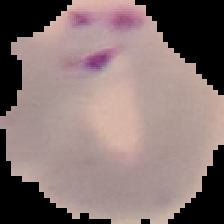

In [90]:
# Taking random image and will see what our model predicts.

img=image.load_img('../input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_108.png',target_size=(224,224))
img

In [91]:
x=image.img_to_array(img)
# print(x)

In [92]:
x.shape

(224, 224, 3)

In [93]:
x=x/255

In [94]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [95]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [96]:
a=np.argmax(model.predict(img_data), axis=1)

In [97]:
a

array([1])

In [98]:
test_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [99]:
# Where we will get to know what label our model has predicted 
# If label is 1 then it means Uninfected
# If label is 0 then it means Infected

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
